# TCC - Genetic Algorithm to control Waves in Games

### Authors:
 - Daniel Hotta
 - Rafael Gonçalves Pereira Silva
 - Ricardo Akira Tanaka

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec


## Simple description

This notebook uses the results of the experiments we made with our Genetic Algorithm to conclude the overall perfomance against a Uniform Enemy Generator and "Naive Strategies" (Like All Enemies with the same color or One of Each color).
For uniform enemies, 10 waves were enough data, otherwise (random and AI) 30 waves were collected.

- The libs you can find in two repositories: [SpaceShip](https://github.com/RGPRafael/godot) and [Tower Defense](https://github.com/raktanaka/tccTD)

- The full dataset can be found [here](https://github.com/raktanaka/tcc-results).




In [3]:
def GetFilelist():
    td_files = []
    ss_files = []

    for subdir, dirs, files in os.walk('.'):
        for file in files:
            if subdir[2:] == 'tccTD' and filepath.endswith('.txt'):
                filepath = subdir + os.sep + file
                td_files.append(filepath)
            elif subdir[2:] == 'tccSS' and filepath.endswith('.txt'):
                filepath = subdir + os.sep + file
                ss_files.append(filepath)
            else:
                pass
    return(td_files, ss_files)

Reads txt data, trimmings results for 300 lines in case of 10 waves, or 900 lines for 30 waves.

In [4]:
def GetFileData(filepath):
  df = pd.read_csv(filepath, header=None, delimiter=';')

  if df.shape[0] < 899:
    return(df.iloc[:300])
  else:
    return(df.iloc[:900])
    

In [5]:
td_allred_ai_file = os.path.join('tccTD', 'AllRed - AI.txt')
td_allred_rd_file = os.path.join('tccTD', 'AllRed - Random.txt')

#td_allgreen_ai_file = os.path.join('tccTD', 'AllGreen - AI.txt')
#td_allgreen_rd_file = os.path.join('tccTD', 'AllGreen - Random.txt')

td_greenred_ai_file = os.path.join('tccTD', 'GreenRed - AI.txt')
td_greenred_rd_file = os.path.join('tccTD', 'GreenRed - Random.txt')

td_redgreen_ai_file = os.path.join('tccTD', 'RedGreen - AI.txt')
td_redgreen_rd_file = os.path.join('tccTD', 'RedGreen - Random.txt')

In [15]:
ss_yellowmove_ai_file = os.path.join('tccSS', 'IA_MOVING_ SHOOTING _YELLOW_SHOOT - AI.txt')
ss_yellowmove_rd_file = os.path.join('tccSS', 'IA_MOVING_ SHOOTING _YELLOW_SHOOT - Random.txt')

ss_yellowstill_ai_file = os.path.join('tccSS', 'IA_STILL_YELLOW_SHOOT - AI.txt')
ss_yellowstill_rd_file = os.path.join('tccSS', 'IA_STILL_YELLOW_SHOOT - Random.txt')

ss_redmove_ai_file = os.path.join('tccSS', 'IA_MOVING_SHOOTING_ RED_SHOOT - AI.txt')
ss_redmove_rd_file = os.path.join('tccSS', 'IA_MOVING_SHOOTING_ RED_SHOOT - Random.txt')

#ss_redstill_ai_file = os.path.join('tccSS', 'IA_STILL_RED_SHOOT - AI.txt')
#ss_redstill_rd_file = os.path.join('tccSS', 'IA_STILL_RED_SHOOT - Random.txt')

Tower Defense data "header"
0: wave number
1-12: element in wave
13: damage done in wave

In [6]:
td_allred_ai = GetFileData(td_allred_ai_file)
td_allred_rd = GetFileData(td_allred_rd_file)

#td_allgreen_ai = GetFileData(td_allgreen_ai_file)
#td_allgreen_rd = GetFileData(td_allgreen_rd_file)

td_greenred_ai = GetFileData(td_greenred_ai_file)
td_greenred_rd = GetFileData(td_greenred_rd_file)

td_redgreen_ai = GetFileData(td_redgreen_ai_file)
td_redgreen_rd = GetFileData(td_redgreen_rd_file)

In [16]:
ss_yellowmove_ai = GetFileData(ss_yellowmove_ai_file)
ss_yellowmove_rd = GetFileData(ss_yellowmove_rd_file)

ss_yellowstill_ai = GetFileData(ss_yellowstill_ai_file)
ss_yellowstill_rd = GetFileData(ss_yellowstill_rd_file)

ss_redmove_ai = GetFileData(ss_redmove_ai_file)
ss_redmove_rd = GetFileData(ss_redmove_rd_file)

#ss_redstill_ai = GetFileData(ss_redstill_ai_file)
#ss_redstill_rd = GetFileData(ss_redstill_rd_file)

In [7]:
def GenerateHeader(df):
    header = ['wave number']

    if df.shape[1] < 14:
        n_enemies = 6
    else:
        n_enemies = 12

    for each in range(n_enemies):
        header.append(str('enemy ' + str(each + 1)))

    header.append('total damage')
    return(header)

In [8]:
td_allred_ai.columns = GenerateHeader(td_allred_ai)
td_allred_rd.columns = GenerateHeader(td_allred_rd)

#td_allgreen_ai.columns(GenerateHeader(td_allgreen_ai)
#td_allgreen_rd.columns(GenerateHeader(td_allgreen_rd)

td_greenred_ai.columns = GenerateHeader(td_greenred_ai)
td_greenred_rd.columns = GenerateHeader(td_greenred_rd)

td_redgreen_ai.columns = GenerateHeader(td_redgreen_ai)
td_redgreen_rd.columns = GenerateHeader(td_redgreen_rd)

In [18]:
ss_yellowmove_ai.columns = GenerateHeader(ss_yellowmove_ai)
ss_yellowmove_rd.columns = GenerateHeader(ss_yellowmove_rd)

ss_yellowstill_ai.columns = GenerateHeader(ss_yellowstill_ai)
ss_yellowstill_rd.columns = GenerateHeader(ss_yellowstill_rd)

ss_redmove_ai.columns = GenerateHeader(ss_redmove_ai)
ss_redmove_rd.columns = GenerateHeader(ss_redmove_rd)

#ss_redstill_ai.columns = GenerateHeader(ss_redstill_ai)
#ss_redstill_rd.columns = GenerateHeader(ss_redstill_rd)

td_allred_ai
td_allred_rd

#td_allgreen_ai
#td_allgreen_rd

td_greenred_ai
td_greenred_rd

td_redgreen_ai
td_redgreen_rd

In [9]:
def CalcStats(series):
    res = []
    res.append(series.mean())
    res.append(series.std())

    return(res)

Calculates the mode for each wave considering the 30 experiments

In [10]:
def CalcMode(df):
    
    res = []

    for i in range(1, 31):
        tmp_df = df[df['wave number'] == i]
        l = tmp_df.iloc[:, 0:-1].mode().iloc[[0]]
        l['average damage'] = f"{tmp_df['total damage'].mean():.2f}"
        res.append(l)

    new_df = pd.concat(res, ignore_index=True)
    return(new_df)

Receives a row of the dataframe to generate the wave image

In [28]:
def ImageWave(df_row):
    n_col = (df_row.shape[0])

    enemy_list, direction_list = ListEnemies(df_row)
    if n_col < 12:
        img_dpi = 75
    else:
        img_dpi = 150

    fig = plt.figure(dpi=img_dpi, tight_layout=True)
    fig.set_size_inches(4, 24, forward=True)
    ax = np.zeros(n_col, dtype=object)
    gs = fig.add_gridspec(1, n_col, height_ratios=[1])
    for i in range(n_col):
        ax[i] = fig.add_subplot(gs[0, i])
        plt.axis('off')
        img, dir = GetImage(enemy_list[i], direction_list[i])
        ax[i].imshow(img)


Auxiliar functions to clean characters and split the enemy and direction from the dataframe

In [20]:
def RemoveChar(str):

    ch_rem = '[] '
    for i in ch_rem:
        str = str.replace(i, '')
    
    str = str.split(',')
    return(str[0], str[1])

def ListEnemies(df_row):

    enemy_list = []
    direction_list = []
    
    for each in df_row:
        enemy, direction = RemoveChar(each)
        enemy_list.append(enemy)
        direction_list.append(direction)

    return(enemy_list, direction_list)

def GetImage(enemy, direction):

    #img_td_blue = mpimg.imread(os.path.join('sprites', 'tank_blue.png'))
    #img_td_green = mpimg.imread(os.path.join('sprites', 'tank_green.png'))
    #img_td_orange = mpimg.imread(os.path.join('sprites', 'tank_orange.png'))
    #img_td_purple = mpimg.imread(os.path.join('sprites', 'tank_purple.png'))
    #img_td_red = mpimg.imread(os.path.join('sprites', 'tank_red.png'))
    #img_td_yellow = mpimg.imread(os.path.join('sprites', 'tank_yellow.png'))

    #img_ss_inimigos = mpimg.imread(os.path.join('sprites', 'inimigos.png'))
    #img_ss_inimigo1 = mpimg.imread(os.path.join('sprites', 'inimigo1.png'))
    #img_ss_inimigo2 = mpimg.imread(os.path.join('sprites', 'inimigo2.png'))
    #img_ss_inimigo3 = mpimg.imread(os.path.join('sprites', 'inimigo3.png'))
    #img_ss_inimigo4 = mpimg.imread(os.path.join('sprites', 'inimigo4.png'))
    #img_ss_inimigo5 = mpimg.imread(os.path.join('sprites', 'inimigo5.png'))

    if enemy == 'EnemyRed':
        img = mpimg.imread(os.path.join('sprites', 'tank_red.png'))
    elif enemy == 'EnemyGreen':
        img = mpimg.imread(os.path.join('sprites', 'tank_green.png'))
    elif enemy == 'EnemyBlue':
        img = mpimg.imread(os.path.join('sprites', 'tank_blue.png'))
    elif enemy == 'EnemyYellow':
        img = mpimg.imread(os.path.join('sprites', 'tank_yellow.png'))
    elif enemy == 'EnemyPurple':
        img = mpimg.imread(os.path.join('sprites', 'tank_purple.png'))
    elif enemy == 'EnemyOrange':
        img = mpimg.imread(os.path.join('sprites', 'tank_orange.png'))

    elif enemy == 'inimigos':
        img = mpimg.imread(os.path.join('sprites', 'inimigos.png'))
    elif enemy == 'inimigo1':
        img = mpimg.imread(os.path.join('sprites', 'inimigo1.png'))
    elif enemy == 'inimigo2':
        img = mpimg.imread(os.path.join('sprites', 'inimigo2.png'))
    elif enemy == 'inimigo3':
        img = mpimg.imread(os.path.join('sprites', 'inimigo3.png'))
    elif enemy == 'inimigo4':
        img = mpimg.imread(os.path.join('sprites', 'inimigo4.png'))
    elif enemy == 'inimigo5':
        img = mpimg.imread(os.path.join('sprites', 'inimigo5.png'))

    return(img, '0')


/tmp/ipykernel_746157/1928951465.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(dpi=img_dpi, tight_layout=True)


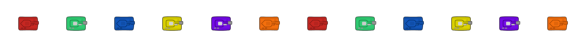

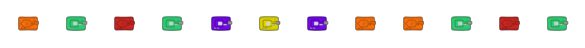

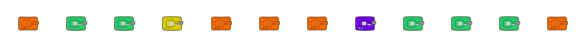

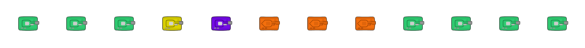

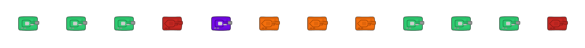

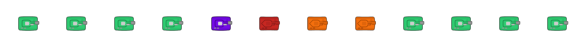

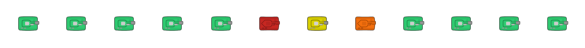

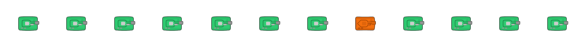

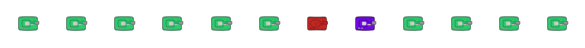

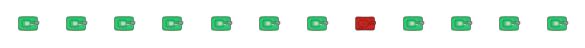

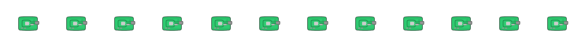

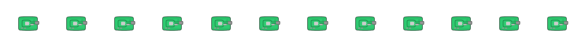

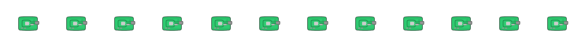

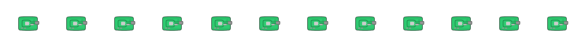

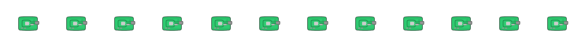

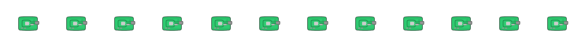

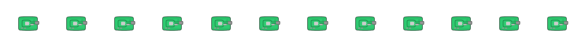

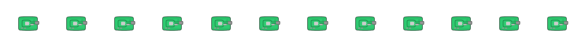

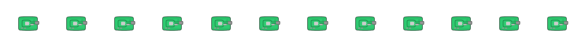

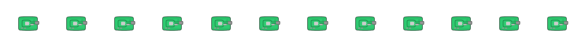

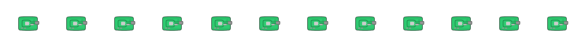

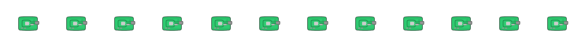

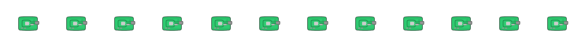

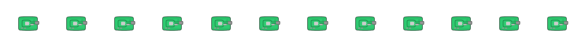

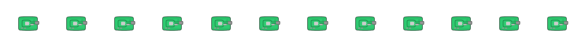

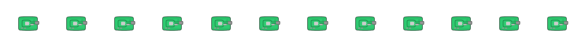

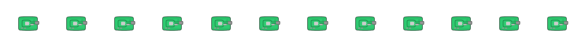

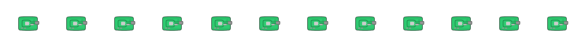

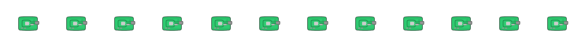

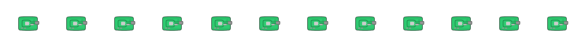

In [29]:
td_greenred_ai_mode = CalcMode(td_greenred_ai)
for i in range(td_greenred_ai_mode.shape[0]):
    ImageWave(td_greenred_ai_mode.iloc[i, 1:-1])


/tmp/ipykernel_746157/1928951465.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(dpi=img_dpi, tight_layout=True)


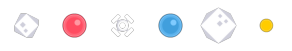

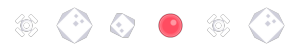

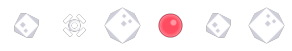

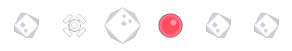

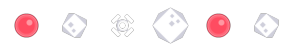

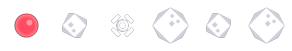

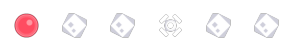

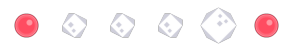

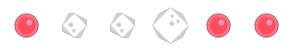

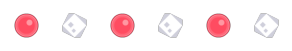

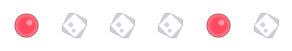

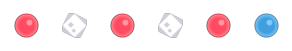

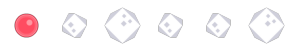

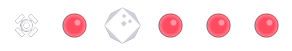

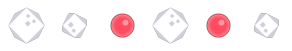

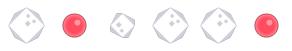

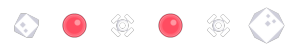

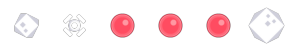

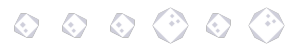

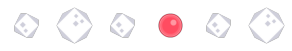

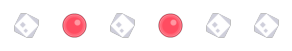

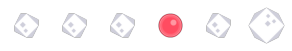

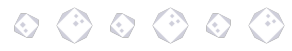

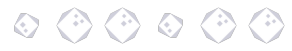

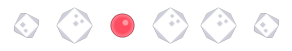

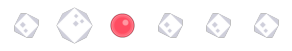

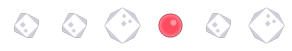

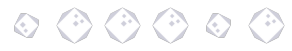

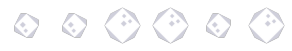

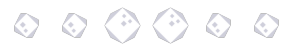

In [30]:
ss_redmove_ai_mode = CalcMode(ss_redmove_ai)
for i in range(ss_redmove_ai_mode.shape[0]):
    ImageWave(ss_redmove_ai_mode.iloc[i, 1:-1])



In [110]:
def GetImage310(enemy, direction):

    #img_td_blue = mpimg.imread(os.path.join('sprites', 'tank_blue.png'))
    #img_td_green = mpimg.imread(os.path.join('sprites', 'tank_green.png'))
    #img_td_orange = mpimg.imread(os.path.join('sprites', 'tank_orange.png'))
    #img_td_purple = mpimg.imread(os.path.join('sprites', 'tank_purple.png'))
    #img_td_red = mpimg.imread(os.path.join('sprites', 'tank_red.png'))
    #img_td_yellow = mpimg.imread(os.path.join('sprites', 'tank_yellow.png'))

    match enemy:
        case 'EnemyRed':
            img = mpimg.imread(os.path.join('sprites', 'tank_red.png'))
        case 'EnemyGreen':
            img = mpimg.imread(os.path.join('sprites', 'tank_green.png'))
        case 'EnemyBlue':
            img = mpimg.imread(os.path.join('sprites', 'tank_blue.png'))
        case 'EnemyYellow':
            img = mpimg.imread(os.path.join('sprites', 'tank_yellow.png'))
        case 'EnemyPurple':
            img = mpimg.imread(os.path.join('sprites', 'tank_purple.png'))
        case 'EnemyOrange':
            img = mpimg.imread(os.path.join('sprites', 'tank_orange.png'))

    return(img, '0')

SyntaxError: invalid syntax (786907468.py, line 10)

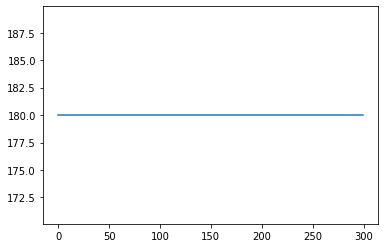

In [ ]:
plt.plot(td_allred_allred[13])

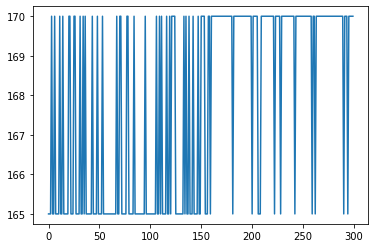

167.81666666666666

In [ ]:
plt.plot(td_allred_oneeach[13])
plt.show()
td_allred_oneeach[13].mean()

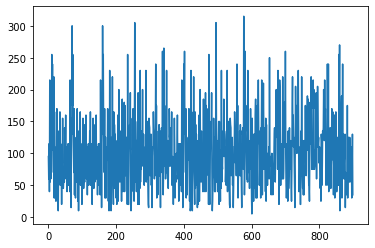

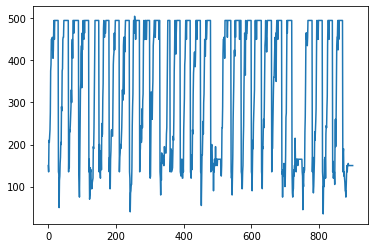

347.22777777777776

In [ ]:
plt.plot(td_redgreen_random[13])
plt.show()
td_redgreen_random[13].mean()

plt.plot(td_redgreen_ai[13])
plt.show()
td_redgreen_ai[13].mean()

In [ ]:
def calculate_mean (data):
  mean_wave = []

  for i in range (0, 30):
    sum_wave = 0

    for j in range (0, 30):
      sum_wave += data[13][i * 30 + j]
      
    mean_wave.append (sum_wave / 30)

  return mean_wave


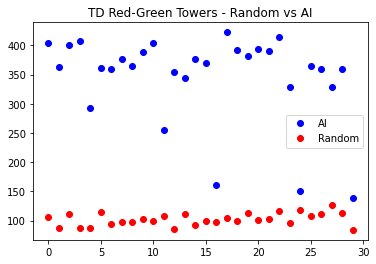

In [ ]:
mean_wave_rg_random = calculate_mean(td_redgreen_random)
mean_wave_rg_ai = calculate_mean(td_redgreen_ai)


plt.title ("TD Red-Green Towers - Random vs AI")
plt.plot(mean_wave_rg_ai, 'bo',label='AI')
plt.plot(mean_wave_rg_random, 'ro', label='Random')
plt.legend(loc="right")
plt.show ()

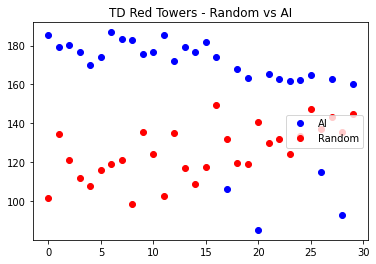

In [ ]:
mean_wave_r_random = calculate_mean(td_allred_random)
mean_wave_r_ai = calculate_mean(td_allred_ai)


plt.title ("TD Red Towers - Random vs AI")
plt.plot(mean_wave_r_ai, 'bo',label='AI')
plt.plot(mean_wave_r_random, 'ro', label='Random')
plt.legend(loc="right")
plt.show ()